In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings(action='ignore')


In [4]:
train=pd.read_csv("train.csv")

In [6]:
train_id=train.id
del train["id"]

In [8]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
def feature_eng(df):
    df=df.copy()
    df['char_unique']=df['f_27'].apply(lambda x: len(set(x)))
    for i in range(df.f_27.str.len().max()):
        df['f_27_char{}'.format(i+1)]=enc.fit_transform(df['f_27'].str.get(i).values.reshape(-1,1))
    return df.drop(['f_27'],axis=1)

train_df=feature_eng(df=train)

In [9]:
train_df=train_df.sample(frac=0.02)
y=train_df.target.values
del train_df["target"]
X=train_df.values

In [11]:
X,y

(array([[ 0.94406893,  0.87201243, -1.568312  , ..., 11.        ,
          3.        ,  1.        ],
        [ 1.98127319, -0.41052506, -1.07708414, ..., 13.        ,
          1.        ,  7.        ],
        [ 0.91249723,  0.02172748,  0.03128187, ...,  9.        ,
          1.        ,  1.        ],
        ...,
        [ 0.90085595, -1.88501458, -0.80492177, ...,  3.        ,
          2.        ,  2.        ],
        [ 0.88292943, -0.39134114,  0.09327965, ..., 12.        ,
          3.        ,  1.        ],
        [-0.61376649,  0.03164298,  1.11992878, ..., 11.        ,
          1.        ,  0.        ]]),
 array([1, 0, 1, ..., 0, 1, 0], dtype=int64))

# model

In [12]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgbm

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [13]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(xgb.XGBClassifier())
classifiers.append(lgbm.LGBMClassifier())


In [14]:
import datetime

#Validation function
n_folds = 5
   
cv_results = []
cv=StratifiedKFold(n_folds, shuffle=True, random_state=42)
for model in classifiers :
    print(datetime.datetime.now())
    cv_results.append(cross_val_score(model, X=X, y = y, scoring = "accuracy", cv = cv, n_jobs=4))

2022-05-29 22:54:26.255131
2022-05-29 22:54:47.496213
2022-05-29 22:54:48.351252
2022-05-29 22:54:49.201402
2022-05-29 22:54:55.769140
2022-05-29 22:54:58.595186
2022-05-29 22:55:12.282821
2022-05-29 22:55:24.649550
2022-05-29 22:55:26.581016
2022-05-29 22:55:26.900366
2022-05-29 22:55:27.154011
2022-05-29 22:55:30.977642


In [15]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [16]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGB","LGBM"]})
print(cv_res)

    CrossValMeans  CrossValerrors                   Algorithm
0        0.588611        0.017131                         SVC
1        0.680778        0.013975                DecisionTree
2        0.682000        0.017343                    AdaBoost
3        0.833500        0.004062                RandomForest
4        0.823000        0.004545                  ExtraTrees
5        0.819667        0.000324            GradientBoosting
6        0.805611        0.010940     MultipleLayerPerceptron
7        0.601444        0.008258                 KNeighboors
8        0.680167        0.004673          LogisticRegression
9        0.685222        0.008124  LinearDiscriminantAnalysis
10       0.882667        0.003946                         XGB
11       0.876944        0.000946                        LGBM


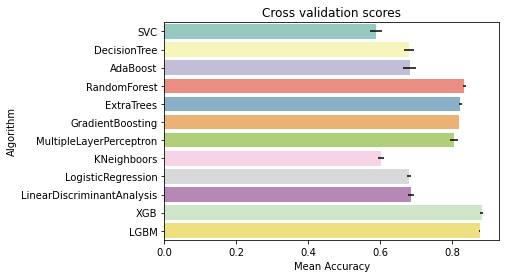

In [17]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [18]:
cv_results

[array([0.60333333, 0.56805556, 0.61222222, 0.58722222, 0.57222222]),
 array([0.65777778, 0.6925    , 0.67638889, 0.67944444, 0.69777778]),
 array([0.65722222, 0.69611111, 0.67416667, 0.67611111, 0.70638889]),
 array([0.82805556, 0.83805556, 0.83833333, 0.83222222, 0.83083333]),
 array([0.81666667, 0.82027778, 0.82555556, 0.83      , 0.8225    ]),
 array([0.82      , 0.82      , 0.81972222, 0.81916667, 0.81944444]),
 array([0.80305556, 0.78666667, 0.80583333, 0.81444444, 0.81805556]),
 array([0.59472222, 0.61666667, 0.6       , 0.60222222, 0.59361111]),
 array([0.67527778, 0.68833333, 0.68222222, 0.67722222, 0.67777778]),
 array([0.67805556, 0.70083333, 0.68416667, 0.67972222, 0.68333333]),
 array([0.88027778, 0.88666667, 0.87611111, 0.88583333, 0.88444444]),
 array([0.87638889, 0.8775    , 0.87833333, 0.87555556, 0.87694444])]

In [19]:
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=cv, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X,y)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

In [ ]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=cv, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X,y)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [ ]:
# XGBoost
XGBC = xgb.XGBClassifier()
xgb_param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
 
gsXGBC = GridSearchCV(XGBC,param_grid = xgb_param_grid, cv=cv, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGBC.fit(X, y)  
XGBC_best = gsXGBC.best_estimator_

# Best score
gsXGBC.best_score_

In [ ]:
# LGBM
LGBMC = lgbm.LGBMClassifier()
lgbm_param_grid = { 'num_leaves': [11, 21, 31, 41],
                    'learning_rate': [.03, 0.05, .07, .1],
                    'n_estimators': [100, 200, 300],
              }
 
gsLGBMC = GridSearchCV(LGBMC,param_grid = lgbm_param_grid, cv=cv, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLGBMC.fit(X, y)  
XGBC_best = gsLGBMC.best_estimator_

# Best score
gsLGBMC.best_score_